#### Part 1 - Merging 12 months of sales data into a single file

In [2]:
#Give path for loop and add

In [3]:
import os
import glob
import pandas as pd

#### Current - Modified directory & Get files of Interest

In [4]:
cd_ = os.getcwd() #Pay attention to \\
cd_

'C:\\Users\\LPeve\\Dropbox\\Python Practice\\Pandas-Data-Science-Tasks-master'

In [5]:
os.chdir(cd_ + "\SalesAnalysis\Sales_Data") # Modify directory to Sales Data

In [6]:
os.getcwd() 

'C:\\Users\\LPeve\\Dropbox\\Python Practice\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data'

In [7]:
extension = 'csv'
all_filenames = [i for i in glob.glob(f'*.{extension}')]
all_filenames

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
os.listdir()    #Gives you a LIST of files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [9]:
print(type(all_filenames))
len(all_filenames) # 12 Months in a Year

<class 'list'>


12

#### Combine all files in the list

##### Option 1 -  Single Liner

In [10]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

##### Option 2 - Lay People

In [11]:
all_months_data = pd.DataFrame() #Empty DataFrame

In [12]:
for ff in all_filenames:
    all_months_data = pd.concat([all_months_data , pd.read_csv(ff)])  #Add to all_months_data the new dataframe

In [13]:
all_months_data.shape

(186850, 6)

##### Exporting CSV

In [14]:
os.chdir('C:\\Users\\LPeve\\Documents\\Python_Practice\\Pandas-Data-Science-Tasks-master')

In [15]:
all_months_data.to_csv('all_months_data.csv',index=False)

#### Resulting CSV attributes

In [16]:
all_months_data.shape

(186850, 6)

In [17]:
all_months_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [18]:
all_months_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#### ------------------------------------------------------------------------------------------------------------

### PART 2 Cleaning

#### Q)        Are there NA values? If so, in all columns, in a particular column, where?

#### Tools:
    df.isna()
    df.any()  | df.all()

In [36]:
# You can use DataFrame.any with parameter axis=1 for check at least one True in row by DataFrame.isna with boolean indexing:

# For SERIES input, the output is a scalar indicating whether any element is True

In [179]:
print(pd.Series([False, False]).any())
print(pd.Series([True, False]).any())

False
True


In [39]:
df = pd.DataFrame({"A": [True, False], "B": [1, 0]})
df

,A,B
0,True,1
1,False,0


In [180]:
df.any(axis=0)  # return a Series whose index is the original column labels.  "Across the rows or cuts the rows"

A    True
B    True
dtype: bool

In [181]:
df.any(axis=1) # return a Series whose index is the original index. "Across the columns or cuts the columns"

0     True
1    False
dtype: bool

In [186]:
# df.isna()    Return a boolean same-sized object 

nan_df = all_months_data.isna().any(axis=1)      #Here we see the rows that contain at least (1) NA values

In [187]:
nan_df = all_months_data   [   all_months_data.isna().any(axis=1)    ]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [44]:
all_months_data.shape

(186850, 7)

In [45]:
all_months_data.dropna(0,subset=['Order Date']).shape

(186305, 7)

In [46]:
all_months_data.dropna(0,subset=['Order Date'],inplace=True)

In [47]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### ------------------------------------------------------------------------------------------------------------

# PART 3 Data Type Manipulation

#### (*) Good Practice to check the Datatype

In [81]:
all_months_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [82]:
type(all_months_data.iloc[0]['Order Date']) 

str

In [83]:
all_months_data.iloc[0]['Order Date']

'04/19/19 08:46'

### Analysis 1 - What was the best month?

#### 1.1 We need to manipulate the df before analysis:
 - add column
 - change dtype of new column

In [48]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [49]:
type(all_months_data.iloc[0]['Order Date'])

str

In [50]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

In [51]:
# GIVES You -> invalid literal for int() with base 10: 'Or'

#          all_months_data['Month'] = all_months_data['Month'].astype('int64')

In [52]:
#Find the where the error is ---- "WOOOOW!!!!"

temp_df = all_months_data[ all_months_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [53]:
all_months_data_rev = all_months_data[ all_months_data['Order Date'].str[0:2] != 'Or']
all_months_data_rev.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [178]:
all_months_data_rev['Month'] = all_months_data_rev['Month'].astype('int32')
all_months_data_rev.head(5)

#### Check dtype change

In [55]:
type(all_months_data.iloc[0]['Month'])

str

In [56]:
type(all_months_data_rev.iloc[0]['Month'])

numpy.int32

In [57]:
all_months_data_rev.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

#### 1.2 Add a sales column
 - add column
 - change dtype of new column

In [ ]:
#He tried to multiply it BUT error because of strings!! understand dtypes and nan

In [64]:
# OPTION 1 = df.astype
all_months_data_rev['Sales'] =   all_months_data_rev['Quantity Ordered'].astype('int32') * \
                                   all_months_data_rev['Price Each'].astype('float64')

<ipython-input-64-82edb1e0d935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_months_data_rev['Sales'] =   all_months_data_rev['Quantity Ordered'].astype('int32') * \


In [188]:
# OPTION 2  pd.to_numeric
all_months_data_rev['Quantity Ordered'] = pd.to_numeric(all_months_data_rev['Quantity Ordered'])
all_months_data_rev['Price Each'] = pd.to_numeric(all_months_data_rev['Price Each'])
                                                                 

In [66]:
all_months_data_rev.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### 1.3 Group and Get analysis
 - add column
 - change dtype of new column

In [68]:
all_months_data_rev.groupby('Month')['Sales'].sum() #Best Month was December

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [73]:
result = all_months_data_rev.groupby('Month')['Sales'].sum()
result

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [59]:
import matplotlib.pyplot as plt

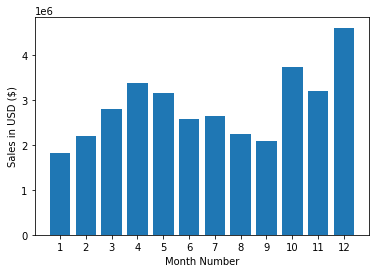

In [75]:
months = range(1,13)

plt.bar(months,result)
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel('Month Number')
plt.show()

### Analysis 2 - What city had the highest number of sales?

#### 1.1 We need to manipulate the df before analysis:
 - add column
 - Be Careful with duplicates cities!! Thus, use not only city name but state

In [153]:
all_months_data_rev.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),Dallas (TX)


#### Option (1) Split

In [ ]:
#It seems to me that the address is always in the format:    STREET,CITY,STATE ZipCode 
#Lets use split

In [111]:
all_months_data_rev.iloc[2]['Purchase Address'].split(', ')

['669 Spruce St', 'Los Angeles', 'CA 90001']

In [120]:
all_months_data_rev.iloc[2]['Purchase Address'].split(', ')[1]

'Los Angeles'

In [147]:
all_months_data_rev['City'] = all_months_data_rev['Purchase Address'].str.split(', ').str[1]
all_months_data_rev.head(2)

#### Option (2) Apply method with state!

In [135]:
def get_city_state(address):
    city = address.split(', ')[1]
    state = address.split(', ')[2][:2]
    return city + " " +"(" + state + ")"

In [149]:
all_months_data_rev['City'] = all_months_data_rev['Purchase Address'].apply(get_city_state)
all_months_data_rev.head(2)

#### 2.1 Groupby

In [163]:
cities_grp = all_months_data_rev.groupby('City')
len(cities_grp)  # 10 Different Cities

10

In [177]:
result = cities_grp['Sales'].sum().sort_values(ascending=False)
result

City
San Francisco (CA)    8.262204e+06
Los Angeles (CA)      5.452571e+06
New York City (NY)    4.664317e+06
Boston (MA)           3.661642e+06
Atlanta (GA)          2.795499e+06
Dallas (TX)           2.767975e+06
Seattle (WA)          2.747755e+06
Portland (OR)         1.870732e+06
Austin (TX)           1.819582e+06
Portland (ME)         4.497583e+05
Name: Sales, dtype: float64

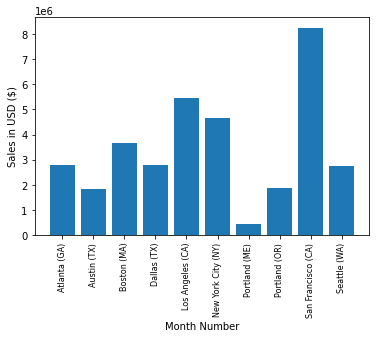

In [176]:
cities = cities_grp['Sales'].sum().index 
result = cities_grp['Sales'].sum()

plt.bar(cities,result)
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel('Month Number')
plt.show()

### Analysis 3 - What time should we display advertisements to maximize likelihood of customer's buying product?

In [196]:
all_months_data_rev.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),Dallas (TX),2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),Boston (MA),2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),Los Angeles (CA),2019-04-12 14:38:00


In [197]:
type(all_months_data['Order Date'].iloc[2])

str

In [202]:
all_months_data_rev['Order Date'] = pd.to_datetime(all_months_data_rev['Order Date'])

In [203]:
all_months_data_rev['Hour'] = all_months_data_rev['Order Date'].dt.hour

In [205]:
hour_filt = all_months_data_rev.groupby('Hour')

In [221]:
hour_filt.count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [208]:
hour_filt.count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Hour')

In [211]:
hour_filt['Order ID']

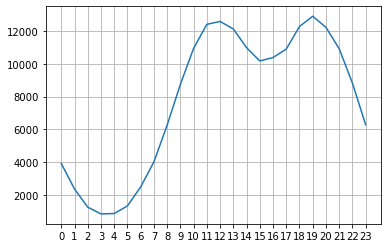

In [214]:
x = hour_filt.count().index
y = hour_filt.count()['Order ID']

plt.plot(x,y)
plt.xticks(x)
plt.grid(True)
plt.show()

### Analysis 4 - What Products are typically sold together?

In [224]:
# What we mean is products having the same ORDER ID

In [225]:
all_months_data_rev.shape

(185950, 12)

In [228]:
orID_grp = all_months_data_rev.groupby('Order ID')
len(orID_grp)

178437

In [229]:
100*len(orID_grp)/max(all_months_data_rev.shape)

95.95966657703684

In [230]:
#Only 5% of all the orders consist of multiple items

In [251]:
orID_grp['Sales'].sum().sort_values(ascending=False)

Order ID
181069    3779.99
200528    3400.00
243728    3400.00
210292    3400.00
255318    3400.00
           ...   
267399       2.99
192132       2.99
302495       2.99
179089       2.99
204578       2.99
Name: Sales, Length: 178437, dtype: float64

In [284]:
a = orID_grp['Product'].apply(lambda x:len(x))

In [285]:
a.nlargest(10)

Order ID
160873    5
165665    4
178158    4
193511    4
194253    4
196615    4
212334    4
226625    4
235798    4
242936    4
Name: Product, dtype: int64

In [252]:
all_months_data_rev.set_index('Order ID',inplace=True)
all_months_data_rev.head(2)
all_months_data_rev.loc['181069']

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date,Hour
Order ID,,,,,,,,,,,
181069,Macbook Pro Laptop,2,1700.00,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.00,San Francisco (CA),San Francisco (CA),2019-04-27 21:01:00,21
181069,34in Ultrawide Monitor,1,379.99,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,379.99,San Francisco (CA),San Francisco (CA),2019-04-27 21:01:00,21


In [278]:
orID_grp['Product'].get_group('181069').value_counts()

Macbook Pro Laptop        1
34in Ultrawide Monitor    1
Name: Product, dtype: int64

In [282]:
orID_grp.count().index

Index(['141234', '141235', '141236', '141237', '141238', '141239', '141240',
       '141241', '141242', '141243',
       ...
       '319661', '319662', '319663', '319664', '319665', '319666', '319667',
       '319668', '319669', '319670'],
      dtype='object', name='Order ID', length=178437)

In [292]:
df['Grouped'] = orID_grp['Product'].transform(lambda x: ','.join(x))

<ipython-input-292-a009f722db77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = orID_grp['Product'].transform(lambda x: ','.join(x))


In [293]:
df.head(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date,Hour,Grouped
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),Dallas (TX),2019-04-19 08:46:00,8,USB-C Charging Cable
1,1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),Boston (MA),2019-04-07 22:30:00,22,Bose SoundSport Headphones


#### Using Duplicate

In [257]:
all_months_data_rev.reset_index(inplace=True)

In [ ]:
#   pd.duplicated
#   Return boolean Series denoting duplicate rows.

In [296]:
df = all_months_data_rev
filt = all_months_data_rev['Order ID'].duplicated(keep=False)
df = df[filt]
df.head(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date,Hour,Grouped
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),Los Angeles (CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),Los Angeles (CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"


In [297]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(2)

<ipython-input-297-e999e7542f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,City_2,MOd Date,Hour,Grouped
2,2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),Los Angeles (CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"
3,3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),Los Angeles (CA),2019-04-12 14:38:00,14,"Google Phone,Wired Headphones"


In [299]:
df = df[['Order ID','Grouped'] ].drop_duplicates()
df.head(2)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"


In [300]:
df.shape

(7136, 2)

In [304]:
df['Grouped'].value_counts()

iPhone,Lightning Charging Cable                              882
Google Phone,USB-C Charging Cable                            856
iPhone,Wired Headphones                                      361
Vareebadd Phone,USB-C Charging Cable                         312
Google Phone,Wired Headphones                                303
                                                            ... 
Vareebadd Phone,Wired Headphones,Apple Airpods Headphones      1
34in Ultrawide Monitor,20in Monitor                            1
iPhone,LG Washing Machine                                      1
27in FHD Monitor,LG Washing Machine                            1
20in Monitor,iPhone                                            1
Name: Grouped, Length: 366, dtype: int64

### Analysis 5- What Product sold the most?

In [312]:
all_months_data_rev.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Sales
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


In [317]:
len(  all_months_data_rev.groupby('Product')['Quantity Ordered'].sum().index )

19

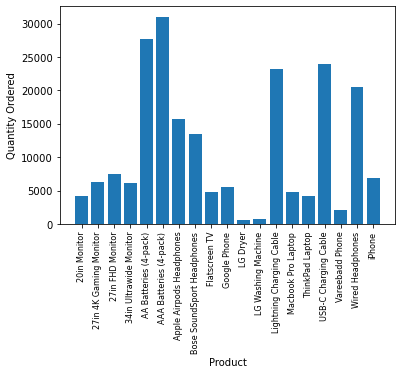

In [316]:
prod_name = all_months_data_rev.groupby('Product').sum().index
quan_or = all_months_data_rev.groupby('Product')['Quantity Ordered'].sum()

plt.bar(prod_name,quan_or)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(prod_name,rotation='vertical',size=8)
plt.show()

In [324]:
prices = all_months_data_rev.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

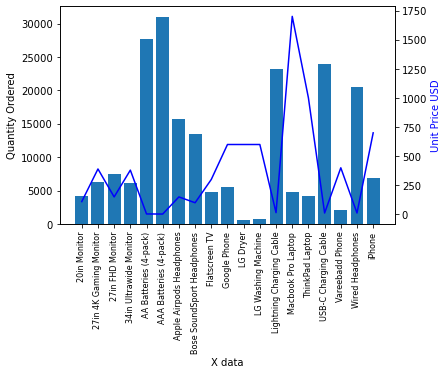

In [328]:
prod_name = all_months_data_rev.groupby('Product').sum().index
quan_or = all_months_data_rev.groupby('Product')['Quantity Ordered'].sum()


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(prod_name, quan_or)
ax2.plot(prod_name, prices, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Unit Price USD', color='b')
ax1.set_xticklabels(prod_name,rotation='vertical',size=8)

plt.show()